---
title: KNN and Decision Trees
author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---


## Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [53]:
!pip install palmerpenguins

zsh:1: command not found: pip


In [54]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import cross_validate
from plotnine import ggplot, aes, geom_line, geom_point, element_text, labs, theme, theme_minimal

In [55]:
penguins = load_penguins()

In [56]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [57]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [58]:
penguins = penguins.dropna()

In [59]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [60]:
X = penguins.drop(columns = "bill_depth_mm")
y = penguins["bill_depth_mm"]

In [61]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Your best multiple linear regression model from before

In [62]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [63]:
lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebeb10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebf1d0>)])),
                ('linear_regression', LinearRegression())])

In [64]:
lr_cv = cross_validate(lr_pipeline, X, y, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [65]:
lr_mse_train = -lr_cv['train_score'].mean()
lr_mse_test = -lr_cv['test_score'].mean()

print(lr_mse_train, lr_mse_test)

0.5787641397436981 0.8832156030162439


## Two kNN models (for different values of K)

For model 1, using `n_neighbors=5`

In [66]:
knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn",KNeighborsRegressor(n_neighbors=5))]
)

In [67]:
knn_model1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebeb10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebf1d0>)])),
                ('knn', KNeighborsRegressor())])

In [68]:
knn_model1_cv = cross_validate(knn_model1, X, y, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [69]:
knn_model1_mse_train = -knn_model1_cv['train_score'].mean()
knn_model1_mse_test = -knn_model1_cv['test_score'].mean()

print(knn_model1_mse_train, knn_model1_mse_test)

0.4457743786432373 1.1918801266395296


For model 2, using `n_neighbors=10`

In [70]:
knn_model2 = Pipeline(
    [("preprocessing", ct),
     ("knn",KNeighborsRegressor(n_neighbors=10))]
)

In [71]:
knn_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebeb10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebf1d0>)])),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [72]:
knn_model2_cv = cross_validate(knn_model2, X, y, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [73]:
knn_model2_mse_train = -knn_model2_cv['train_score'].mean()
knn_model2_mse_test = -knn_model2_cv['test_score'].mean()

print(knn_model2_mse_train, knn_model2_mse_test)

0.5175535231336769 1.1829089461781996


## A decision tree model

In [74]:
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeRegressor())]
)

dt_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebeb10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x175ebf1d0>)])),
                ('decision_tree', DecisionTreeRegressor())])

In [75]:
dt_pipeline_cv = cross_validate(dt_pipeline, X, y, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [76]:
dt_pipeline_mse_train = -dt_pipeline_cv['train_score'].mean()
dt_pipeline_mse_test = -dt_pipeline_cv['test_score'].mean()

print(dt_pipeline_mse_train, dt_pipeline_mse_test)

-0.0 1.580716870194482


In [77]:
models = ['Linear Regression', "KNN (n_neighbors = 5)", "KNN (n_neighbors = 10)", "Decision Tree"]
train_mse = [lr_mse_train, knn_model1_mse_train, knn_model2_mse_train, dt_pipeline_mse_train]
test_mse = [lr_mse_test, knn_model1_mse_test, knn_model2_mse_test, dt_pipeline_mse_test]

results_df = pd.DataFrame({"Models": models,
                           "Train_MSE": train_mse,
                           "Test_MSE": test_mse})
results_df

,Models,Train_MSE,Test_MSE
0,Linear Regression,0.578764,0.883216
1,KNN (n_neighbors = 5),0.445774,1.191880
2,KNN (n_neighbors = 10),0.517554,1.182909
3,Decision Tree,-0.000000,1.580717


## Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

## Which of your models was best?

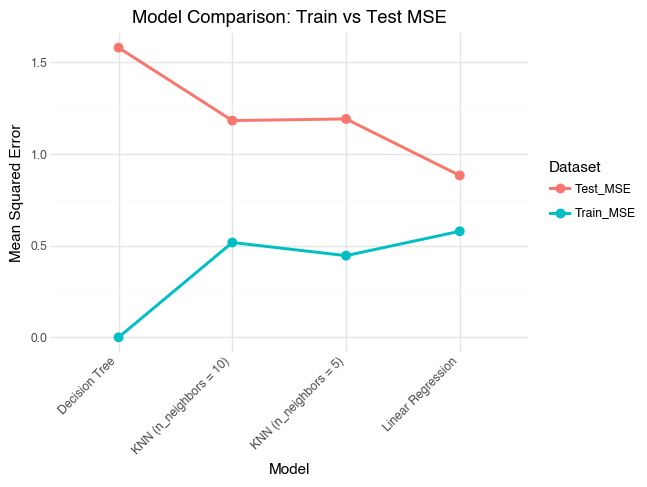

In [78]:
results_df_long = results_df.melt(id_vars = "Models",
                                  value_vars = ["Train_MSE", "Test_MSE"],
                                  var_name = "Set", value_name = "MSE")

plot = (
    ggplot(results_df_long, aes(x="Models", y="MSE", color="Set", group="Set")) +
    geom_line(size=1.2) +
    geom_point(size=3) +
    labs(
        title="Model Comparison: Train vs Test MSE",
        x="Model",
        y="Mean Squared Error",
        color="Dataset"
    ) +
    theme_minimal() +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)

plot

Interpretation: The best model is the Linear Regression model since it has the lowest difference between Train MSE and Test MSE, showing good generalization. The Decision Tree model is the worst because it has the largest gap between Train MSE and Test MSE, indicating overfitting.